# **Classification Project: Will George Like This Song?**

Autor: Prabu Jeyabalan

**I. K-Nearest Neighbors (KNN) with Spotify Data**

# Libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
import re

**Classification**


# I) 𝐾-Nearest Neighbors

**You Like This Song…But Will George Like It?**

**1. Dataset Overview and Selection**

In [176]:
df1 = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df = pd.read_csv('spotify.csv')

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [178]:
df1.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [179]:
df1['track_name'].unique()[570:600]

array(["Don't Be Shy", 'Love Grows (Where My Rosemary Goes)',
       'LA FAMA (with The Weeknd)', 'The Family Madrigal',
       'Phantom Regret by Jim', 'Dos Oruguitas', 'Freaks', 'Acapulco',
       'Daddy Issues', 'thought i was playing', 'ELEVEN',
       'Mood (feat. Iann Dior)', 'What Else Can I Do?', 'DANCE CRIP',
       'Miserable Man', 'happier', 'Praise God', 'Get Into It (Yuh)',
       'Before You Go', 'Sky', 'Rolling in the Deep', 'Sobrio', 'Peru',
       'favorite crime', 'Thunder', 'The Business', 'positions',
       'I WANNA BE YOUR SLAVE', 'Vai Lï¿½ï¿½ Em Casa ', 'The Feels'],
      dtype=object)

*I chose Thunder by Imagine Dragons because its upbeat rhythm and empowering lyrics inspire me to stay motivated and push through challenges. The song's message about embracing individuality and striving for success resonates with me.*

**2. Extracting and Examining Song Features
Identify and list feature values for:
danceability, energy, speechiness, acousticness, liveness, valence, BPM**

In [180]:
# Finding the song "Thunder" in the DataFrame
thunder_data = df[df["song_title"] == "Thunder"]
thunder_data_1 = df1[df1["track_name"] == "Thunder"]

# Extracting the relevant features
danceability = thunder_data['danceability'].iloc[0]
energy = thunder_data['energy'].iloc[0]
speechiness = thunder_data['speechiness'].iloc[0]
acousticness = thunder_data['acousticness'].iloc[0]
liveness = thunder_data['liveness'].iloc[0]
valence = thunder_data['valence'].iloc[0]
bpm = thunder_data_1['bpm'].iloc[0]

# Printing the values
print(f"Danceability: {danceability}")
print(f"Energy: {energy}")
print(f"Speechiness: {speechiness}")
print(f"Acousticness: {acousticness}")
print(f"Liveness: {liveness}")
print(f"Valence: {valence}")
print(f"BPM: {bpm}")

Danceability: 0.608
Energy: 0.841
Speechiness: 0.0464
Acousticness: 0.00593
Liveness: 0.121
Valence: 0.25
BPM: 101


**Extracting the row for the chosen song and converting it to a standalone dataframe.**

In [181]:
df1[df1['track_name'] == 'Thunder']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
597,Thunder,"Prezioso, Gabry Ponte, LUM!X",3,2021,5,7,4846,10,422691058,54,...,101,C#,Major,67,40,90,3,0,34,6


**Loading and Inspecting the Main Spotify Dataset**

In [182]:
df = pd.read_csv('spotify.csv')

In [183]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


**Data Cleaning and Preprocessing**

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [185]:
df['target'].dtype

dtype('int64')

In [186]:
df['target'] = df['target'].astype('category')

In [187]:
df['target'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

**8. What unique values does the target variable have? For each of these outcome values,
find out how many records in the dataset have that value, and state it here.**

In [188]:
df['target'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [189]:
df['target'].value_counts()

target
1    1020
0     997
Name: count, dtype: int64

**Checking for NAs in this dataset and replacing them with the median value for that column.**

In [190]:
print(df.isna().sum())

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64


*Null values was not found in the dataset.*

**Now it’s time for just a bit of data engineering.**


In [191]:
selected_columns = ['danceability_%', 'energy_%', 'speechiness_%', 'valence_%', 'acousticness_%', 'liveness_%']
df1[selected_columns] = df1[selected_columns] / 100

In [192]:
df1.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,0.80,0.89,0.83,0.31,0,0.08,0.04
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,0.71,0.61,0.74,0.07,0,0.10,0.04
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,0.51,0.32,0.53,0.17,0,0.31,0.06
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,0.55,0.58,0.72,0.11,0,0.11,0.15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,0.65,0.23,0.80,0.14,63,0.11,0.06


**Changing the names of column variables for danceability, energy, speechiness,
valence, acousticness, and liveness so that they match the names in spotify. Also,
change the BPM variable name for your song to tempo . so that the names become a
perfect match**

In [193]:
df1.rename(columns={
    'track_name': 'song_title',
    'danceability_%': 'danceability',
    'energy_%': 'energy',
    'speechiness_%': 'speechiness',
    'valence_%': 'valence',
    'acousticness_%': 'acousticness',
    'liveness_%': 'liveness',
    'artist(s)_name': 'artist',
    'bpm': 'tempo'
                    }, inplace=True)

**Partitioning the spotify dataset into training (60%) and validation (40%) sets.
Next, I will do some variable selection.**

In [194]:
# Select only relevant numeric variables for analysis
selected_features = ['danceability', 'tempo', 'energy', 'speechiness', 'valence', 'acousticness', 'liveness']
X = df[selected_features]
y = df['target']  # Target variable: 1 (liked), 0 (not liked)

# Perform 60-40 train-validation split, maintaining class balance
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=218, stratify=y)

# Display class distributions after the split
print("Training set class distribution:\n", y_train.value_counts())
print("\nValidation set class distribution:\n", y_val.value_counts())

Training set class distribution:
 target
1    612
0    598
Name: count, dtype: int64

Validation set class distribution:
 target
1    408
0    399
Name: count, dtype: int64


**Using training set, performing a series of two-sample t-tests to compare the numeric values for songs that George liked vs ones that he did not like. Focusing only on
these seven variables: danceability, tempo, energy, speechiness, valence, acousticness,
and liveness .**

In [195]:
# Split training data into liked and not liked songs
liked = X_train[y_train == 1]
not_liked = X_train[y_train == 0]

# Perform two-sample t-tests for each variable
t_test_results = {var: ttest_ind(liked[var], not_liked[var], equal_var=False) for var in selected_features}

# Store results in a DataFrame
t_test_df = pd.DataFrame({
    'Variable': selected_features,
    'T-Statistic': [t_test_results[var].statistic for var in selected_features],
    'P-Value': [t_test_results[var].pvalue for var in selected_features]
})

# Display the t-test results
print(t_test_df)

       Variable  T-Statistic       P-Value
0  danceability     5.493035  4.815867e-08
1         tempo     1.672613  9.466420e-02
2        energy     1.325847  1.851665e-01
3   speechiness     7.224940  9.658346e-13
4       valence     3.242169  1.218647e-03
5  acousticness    -4.659915  3.550556e-06
6      liveness     0.701352  4.832190e-01


**Identifing variables showing a significant difference, For any variables for which there
is not a significant difference between the ‘like’ and ‘dislike’ values, I removed them
entirely from the data.**

*Variables with significant differences are:*

*Danceability, Speechiness, Valence, Acousticness*

In [196]:
# Define the significant variables
significant_vars = ['danceability', 'speechiness', 'valence', 'acousticness']

# Update the training and validation sets
X_train = X_train[significant_vars]
X_val = X_val[significant_vars]

# Display the updated feature list
print("Selected variables after removing insignificant ones:", significant_vars)

Selected variables after removing insignificant ones: ['danceability', 'speechiness', 'valence', 'acousticness']


*In a k-NN model, removing variables that show no significant difference between outcome classes espessially those with high p-values helps improve model efficiency and accuracy. If a variable has similar values for both classes, it does not contribute meaningful separation between them and may add unnecessary noise, potentially reducing the model’s ability to classify new data correctly. Removing such variables reduces dimensionality, improving computation speed and avoiding overfitting.*

**Normalizing the data using the StandardScaler() function.**

In [197]:
# Define significant variables (from t-test results)
significant_vars = ['danceability', 'speechiness', 'valence', 'acousticness']

# Extract features and target
X = df[significant_vars]
y = df['target']

# Split dataset into 60% training and 40% validation (with stratified split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

print("Training and validation data prepared.")

Training and validation data prepared.


In [198]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only on the training set, then transform validation set
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Data normalization complete.")

Data normalization complete.


**Using a 𝑘-value of 7, generate a predicted classification for my song – Will George like it or not?**

**– What outcome did the model predict?**

**– Also, what were my song’s 7 nearest neighbors?**

**– Listing their titles, artists, and outcome classes. making sure to show their outcome classes in write-up.**

In [199]:
# Initialize k-NN model with k=7
knn = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [200]:
# Ensure song title formatting matches
song_to_predict = df[df['song_title'].str.lower() == 'thunder'][significant_vars]

# Check if the song exists in the dataset
if not song_to_predict.empty:
    # Normalize the song's features
    song_scaled = scaler.transform(song_to_predict)

    # Make the prediction
    predicted_outcome = knn.predict(song_scaled)
    prediction_result = "Like" if predicted_outcome[0] == 1 else "Dislike"

    print(f"Predicted outcome for 'Thunder': {prediction_result}")
else:
    print("Error: Song 'Thunder' not found in the dataset. Ensure the title matches exactly.")


Predicted outcome for 'Thunder': Dislike


In [201]:
if not song_to_predict.empty:
    # Get indices of 7 nearest neighbors
    neighbors_indices = knn.kneighbors(song_scaled, n_neighbors=7, return_distance=False)[0]

    # Retrieve nearest neighbor songs
    nearest_neighbors = df.iloc[neighbors_indices][['song_title', 'artist', 'target']]
    nearest_neighbors['target'] = nearest_neighbors['target'].map({1: 'Like', 0: 'Dislike'})

    # Display nearest neighbors
    print("7 Nearest Neighbors:")
    print(nearest_neighbors)

7 Nearest Neighbors:
                        song_title                artist   target
165                       Magnolia          Young & Sick     Like
1024                   Craving You          Thomas Rhett  Dislike
519                 Can I Kick It?  A Tribe Called Quest     Like
1076                There’s A Girl          Trent Harmon  Dislike
986               Hood Pass Intact              Dâm-Funk     Like
281                  Zion Gate Dub            King Tubby     Like
392   Never Never Gonna Give Ya Up           Barry White     Like


**Using my validation set to help you determine an optimal 𝑘-value.**


In [202]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only on training data, then transform validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Data normalized using StandardScaler.")

Data normalized using StandardScaler.


In [203]:
# Define range of k-values to test
k_values = range(1, 21)  # Testing k from 1 to 20
accuracy_scores = []

# Loop through k values and evaluate performance on the validation set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    accuracy_scores.append(acc)

# Find the best k-value (highest accuracy)
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal k-value: {best_k}")

Optimal k-value: 13


**Making a scatterplot with the various 𝑘 values that I used in the previous step on
my x-axis, and the accuracy metrics on the y-axis.**

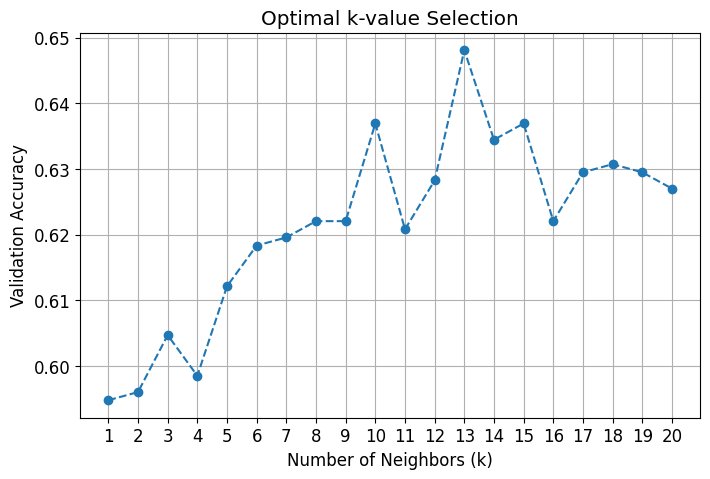

In [204]:
# Plot accuracy vs. k-value
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Optimal k-value Selection')
plt.xticks(k_values)
plt.grid()
plt.show()

**Re-runnig the knn function with the optimal 𝑘-value that I found previously.**

In [205]:
# Set optimal k-value found earlier (k=13)
optimal_k = 13
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the k-NN model
knn_optimal.fit(X_train_scaled, y_train)

# Locate "Thunder" in dataset
song_to_predict = df[df['song_title'].str.lower() == 'thunder'][significant_vars]

if not song_to_predict.empty:
    # Normalize "Thunder's" features
    song_scaled = scaler.transform(song_to_predict)

    # Predict whether George will like it
    predicted_outcome = knn_optimal.predict(song_scaled)
    prediction_result = "Like" if predicted_outcome[0] == 1 else "Dislike"
    print(prediction_result)
    print(f"Predicted outcome for 'Thunder' with k={optimal_k}: {prediction_result}")


Dislike
Predicted outcome for 'Thunder' with k=13: Dislike


In [206]:
    # Find the 13 nearest neighbors
    neighbors_indices = knn_optimal.kneighbors(song_scaled, n_neighbors=optimal_k, return_distance=False)[0]

    # Retrieve song titles, artists, and outcome classes
    nearest_neighbors = df.iloc[neighbors_indices][['song_title', 'artist', 'target']]
    nearest_neighbors['target'] = nearest_neighbors['target'].map({1: 'Like', 0: 'Dislike'})

    # Display nearest neighbors
    # Find the 13 nearest neighbors
    neighbors_indices = knn_optimal.kneighbors(song_scaled, n_neighbors=optimal_k, return_distance=False)[0]

    # Retrieve song titles, artists, and outcome classes
    nearest_neighbors = df.iloc[neighbors_indices][['song_title', 'artist', 'target']]
    nearest_neighbors['target'] = nearest_neighbors['target'].map({1: 'Like', 0: 'Dislike'})

    # Display nearest neighbors
    print(f"13 Nearest Neighbors with k={optimal_k}:")
    nearest_neighbors

13 Nearest Neighbors with k=13:


,song_title,artist,target
165,Magnolia,Young & Sick,Like
1024,Craving You,Thomas Rhett,Dislike
519,Can I Kick It?,A Tribe Called Quest,Like
1076,There’s A Girl,Trent Harmon,Dislike
986,Hood Pass Intact,Dâm-Funk,Like
281,Zion Gate Dub,King Tubby,Like
392,Never Never Gonna Give Ya Up,Barry White,Like
88,Dadje Von O Von Non,Gnonnas Pédro,Like
1115,Hasta el Amanecer,Nicky Jam,Dislike
410,Walking Into Sunshine,Central Line,Like


**Limitations of This k-NN Model for Song Recommendation**

**Lack of Contextual Factors:**

*The model only considers numeric attributes like danceability, valence, and speechiness, ignoring personal preferences, lyrics, cultural background, or listening habits that might heavily influence song preference.*

**Feature Representation Bias:**

Songs with similar acoustic properties do not always mean similar personal appeal. For example, two songs might have high danceability but belong to different genres that a user may or may not enjoy.

**Cold Start Problem:**

If a new song is introduced without sufficient data, k-NN struggles to make accurate predictions because it relies entirely on similarity with existing songs.

**Equal Weight to All Features:**

The k-NN model treats all features equally, which may not reflect their true importance. Some attributes (e.g., genre, artist familiarity) might be more influential than others in predicting song preference.

**Scalability Issues:**

k-NN requires storing and comparing all songs in the dataset, which becomes computationally expensive as the dataset grows.

# II) Naive Bayes

**Again in this section, I will be performing classification. For this model, I will take another
shot at predicting income, using the AER_credit_card_data.csv dataset.**

In [207]:
data = pd.read_csv('AER_credit_card_data.csv')

In [208]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [210]:
categorical_vars = ['card', 'owner', 'selfemp']
data[categorical_vars] = data[categorical_vars].astype('category')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables to integer codes
for var in categorical_vars:
    data[var] = label_encoder.fit_transform(data[var])

In [211]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


**• The response variable in our model will be income.**

**• Currently, income is a numeric variable, so we will need to make an adjustment here.
Bin income into three total groups. These groups should be labeled High, Medium, and
Low. Use an equal-frequency binning process.**

In [212]:
# Bin 'income' into three equal-frequency groups
income_binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
data['income'] = income_binner.fit_transform(data[['income']])

# Label the bins
bin_labels = {0: 'High', 1: 'Medium', 2: 'Low'}
data['income'] = data['income'].map(bin_labels)

**• Show the results of your binning in a table.**

In [213]:
# Show the results of binning
print(data['income'].value_counts())

income
Low       469
High      440
Medium    410
Name: count, dtype: int64


**• For the numeric variables in your data, bin them into factors. Bin them using equal
frequency binning. Be sure to give a label to each bin. Selecting a bin number of my choice.**

In [214]:
# Example numeric variables list (including 'reports')
numeric_vars = ['reports', 'age', 'share', 'expenditure', 'dependents', 'months', 'active']

# Initialize KBinsDiscretizer for quantile-based binning
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

for var in numeric_vars:
    data[var] = data[var].astype(float)

    if var == 'reports':
        bins = [-1, 0, 2, float('inf')]
        labels = ['Low', 'medium', 'High']
        data[var] = pd.cut(data[var], bins=bins, labels=labels)

    else:
        binned_data = kbins.fit_transform(data[[var]])
        bin_labels = ['Low', 'Medium', 'High']

        # Map numeric bin indices (0, 1, 2) to our bin labels
        bin_mapping = {i: label for i, label in enumerate(bin_labels)}
        data[var] = pd.Series(binned_data.flatten(), index=data.index).map(bin_mapping)

    # Print some info about the binning result
    print(f"Binning results for '{var}':")
    print(data[var].value_counts())
    print()


Binning results for 'reports':
reports
Low       1060
medium     187
High        72
Name: count, dtype: int64

Binning results for 'age':
age
High      441
Medium    440
Low       438
Name: count, dtype: int64

Binning results for 'share':
share
Low       440
High      440
Medium    439
Name: count, dtype: int64

Binning results for 'expenditure':
expenditure
Low       440
High      440
Medium    439
Name: count, dtype: int64

Binning results for 'dependents':
dependents
Medium    660
Low       659
Name: count, dtype: int64

Binning results for 'months':
months
High      452
Low       435
Medium    432
Name: count, dtype: int64

Binning results for 'active':
active
Medium    477
High      458
Low       384
Name: count, dtype: int64



**• Show the results of this process.**

In [215]:
# Show the first few rows to verify changes
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,Low,High,Low,Medium,Medium,1,0,Medium,High,1,High
1,1,Low,Medium,High,Low,Low,0,0,Medium,Medium,1,High
2,1,Low,Medium,Low,Low,Low,1,0,Medium,High,1,Medium
3,1,Low,Medium,Medium,Medium,Medium,0,0,Low,Medium,1,Medium
4,1,Low,Medium,Low,Medium,High,1,0,Medium,High,1,Medium


**• For any variables that could not be evenly-binned, explaining the situation.
– Why was equal frequency binning not possible, and what approach I took ?**


**1. Repeated Values Cause Skewed Bins**

**Issue:**

Some numeric variables contain many repeated values (e.g., reports, dependents).
Since KBinsDiscretizer creates bins based on quantiles, if many observations have the same value, they may all end up in the same bin, making it impossible to distribute them evenly.

**Solution Taken:**

The bins were created as evenly as possible, but due to data clustering, some bins have slightly more or fewer observations than others.
This was acceptable since the goal was to approximate equal frequency.

**2. Low Variability in Data**

**Issue:**

Some variables, such as reports or majorcards, may have very few unique values.
If a column contains only three unique values, and we attempt to bin it into three groups, the binning process might assign each unique value to a separate bin, but not necessarily in equal proportions.

**Large spike at zero or few unique values**

*Since many rows have reports == 0, that alone can fill an entire bin, causing the other bins to end up unbalanced.*

*reports has fewer unique values than n_bins (or just enough that the quantile cuts all fall at the same points), bins does not end up equally sized.*


**Solution Taken:**

Manually adjusted the bins in cases where KBinsDiscretizer failed to distribute values evenly.

**3. Ties at Quantile Boundaries**

**Issue:**

If many values are clustered around the same quantile boundary, they may all get assigned to the same bin rather than being spread evenly.

**Solution Taken:**

Allowed slight imbalances in bin sizes rather than forcing an exact 33% split.
Used default behavior of KBinsDiscretizer and manually checked distributions

**• Using a random seed value, partition data into training (60%) and validation (40%) sets.**

In [216]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 218

# Split the data into training and validation sets (60% training, 40% validation)
train_data, validation_data = train_test_split(data, test_size=0.4, random_state=random_seed)

# Display the sizes of the training and validation sets to verify
print("Training Data Size:", train_data.shape)
print("Validation Data Size:", validation_data.shape)

Training Data Size: (791, 12)
Validation Data Size: (528, 12)


**• Let’s take a look at the variables from the dataset, and explore the way that they might
impact income. Using your training set data only, make a proportional barplot for each
one of your prospective input variables. Each barplot should show one of your input
variables as a category on the x-axis, with income as the fill variable. You should build
proportional barplots.**

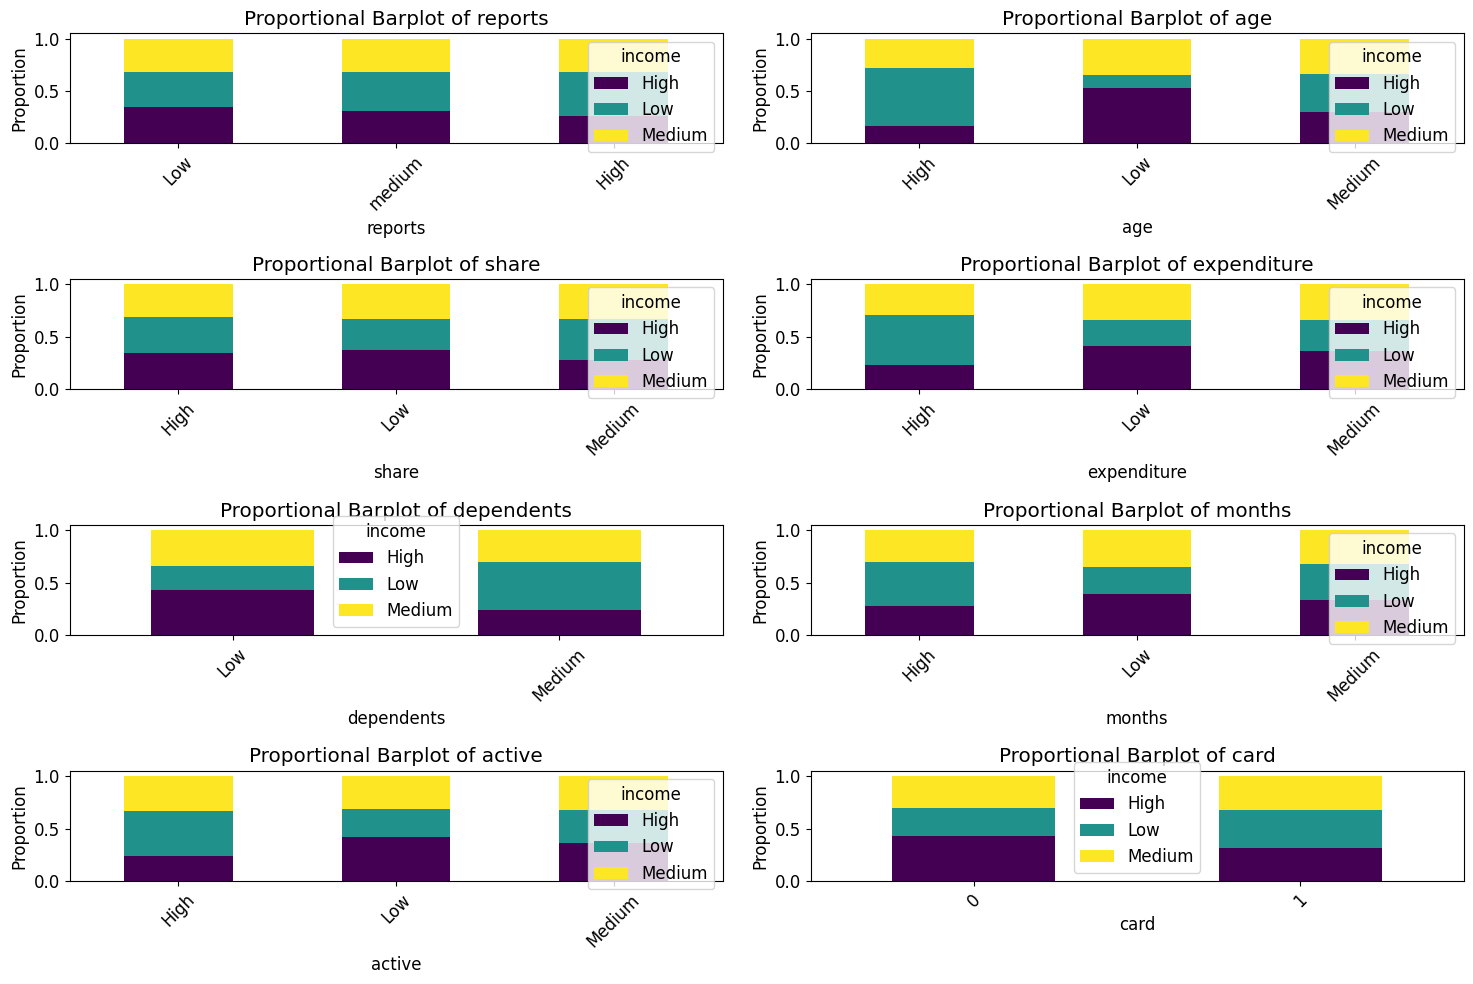

In [217]:
def plot_proportional_barplots(data, input_vars, target_var):
    # Enlarge the figure size and adjust font sizes
    plt.figure(figsize=(15, 10))
    plt.rcParams.update({'font.size': 12})

    n_cols = 2
    n_rows = (len(input_vars) + 1) // 2

    for i, var in enumerate(input_vars, 1):
        plt.subplot(n_rows, n_cols, i)
        proportion_table = data.groupby(var)[target_var].value_counts(normalize=True).unstack().fillna(0)
        proportion_table.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
        plt.title(f'Proportional Barplot of {var}')
        plt.ylabel('Proportion')
        plt.xlabel(var)
        plt.xticks(rotation=45)  # Rotate x labels for better visibility

    plt.tight_layout()
    plt.show()

# List of variables to plot
input_vars = ['reports', 'age', 'share', 'expenditure', 'dependents', 'months', 'active', 'card']

# Call the function with the training data
plot_proportional_barplots(train_data, input_vars, 'income')

**• Based on the barplots that you see here, select any variable(s) that seem like they will
not have a strong amount of predictive power in a naive Bayes model. Drop any such
variable.**

*Uniform Distribution: Variables where the income categories are nearly uniformly distributed across its categories are less likely to be informative for predicting income, as they do not show a strong relationship with the income levels.*

**Variable Analysis:**

**reports:** *The proportions of income levels are quite uniform across the categories of the 'report' variable. This suggests that the number of reports accounts may not significantly differentiate between different income levels.*

*Given this analysis, dropping 'reports' from the model due to their lower potential for predicting income effectively in a Naive Bayes context.*

In [218]:
# Drop 'reports'from both training and validation datasets
train_data = train_data.drop(['reports'], axis=1)
validation_data = validation_data.drop(['reports'], axis=1)

In [219]:
train_data.head()

,card,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
435,1,Low,High,Low,Low,0,0,Low,Medium,1,High
1090,1,Medium,Low,Medium,High,1,0,Medium,High,1,High
821,1,Low,Medium,Low,Low,0,0,Medium,Low,1,Low
1287,0,Low,High,Low,Low,0,0,Medium,Low,1,Medium
550,1,High,Medium,Medium,Medium,1,1,Low,High,1,High


In [220]:
validation_data.head()

,card,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1078,1,Medium,Low,Medium,High,1,0,Medium,Low,1,Low
1011,1,Medium,Low,Low,Low,1,0,Medium,Medium,1,High
746,1,Low,High,High,High,0,0,Low,High,1,Medium
346,1,Low,High,Medium,Medium,0,0,Low,Medium,1,Low
862,1,Medium,Low,Low,Low,0,0,Low,High,1,Medium


**• Build a Naive Bayes model, with the response variable income. Use all of the other
remaining variables in your training set as inputs. Show your model results**

In [221]:
from sklearn.preprocessing import OrdinalEncoder

# Separate features (X) and target (y) for training and validation sets
X_train = train_data.drop('income', axis=1)
y_train = train_data['income']
X_val = validation_data.drop('income', axis=1)
y_val = validation_data['income']

# Initialize OrdinalEncoder with handle_unknown='use_encoded_value' and a non-negative unknown_value
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan) # Handle unknown categories with NaN

# Fit and transform the encoder on training data and transform validation data
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)

# Impute NaN values with the most frequent category for each feature
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Initialize and train the Categorical Naive Bayes model
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = nb_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

        High       0.49      0.60      0.54       175
         Low       0.57      0.64      0.60       198
      Medium       0.34      0.21      0.26       155

    accuracy                           0.50       528
   macro avg       0.47      0.48      0.47       528
weighted avg       0.48      0.50      0.48       528



**Showing a confusion matrix that compares the performance of your model against the
training data, and another that shows its performance against the validation data (just
use the accuracy metric for this analysis). How did my training set’s performance
compare with my validation set’s performance?**

In [222]:
# Predict on training data
y_train_pred = nb_model.predict(X_train)

# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(cm_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Confusion matrix for validation data (already calculated above)
cm_val = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix (Validation Data):")
print(cm_val)
validation_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {validation_accuracy}")

print(f"\nTraining accuracy: {train_accuracy}")
print(f"Validation accuracy: {validation_accuracy}")

print(f"\nDifference in accuracy: {train_accuracy - validation_accuracy}")


Confusion Matrix (Training Data):
[[175  55  35]
 [ 47 194  30]
 [111  98  46]]
Training Accuracy: 0.5246523388116309

Confusion Matrix (Validation Data):
[[105  40  30]
 [ 40 127  31]
 [ 68  55  32]]
Validation Accuracy: 0.5

Training accuracy: 0.5246523388116309
Validation accuracy: 0.5

Difference in accuracy: 0.02465233881163087


**• Take a subset of the 100 records in your validation set that your model predicted to be
most likely to belong to the High income group.**

In [223]:
# Get predicted probabilities for the 'High' income group
predicted_probabilities = nb_model.predict_proba(X_val)
high_income_probabilities = predicted_probabilities[:, list(nb_model.classes_).index('High')]

# Create a DataFrame with probabilities and indices
probability_df = pd.DataFrame({'probability': high_income_probabilities, 'index': validation_data.index})

# Sort the DataFrame by probability in descending order
probability_df = probability_df.sort_values('probability', ascending=False)

# Get the indices of the top 100 records
top_100_indices = probability_df.head(100)['index'].tolist()

# Subset the validation set using the indices
top_100_high_income = validation_data.loc[top_100_indices]

# Display the subset
top_100_high_income


,card,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
296,0,Low,High,Low,Low,0,0,Low,Low,0,Low
1088,0,Low,High,Low,Low,0,0,Low,Low,0,Medium
1103,0,Low,High,Low,Low,0,0,Low,Medium,0,Medium
492,0,Low,High,Low,Low,0,0,Low,Low,1,Low
321,0,Low,High,Low,Low,0,0,Low,Low,1,Low
...,...,...,...,...,...,...,...,...,...,...,...
221,1,Medium,Medium,Low,Low,0,0,Low,Medium,1,Low
357,1,Medium,Low,Low,Low,0,0,Low,Medium,1,Low
118,1,Low,Medium,Medium,Medium,0,0,Medium,Medium,0,Low
841,0,Medium,Medium,Low,Low,0,0,Medium,High,0,Low


**• Among those 100 records, how many of the people were actually in the high income
group? How does the accuracy for these predictions compare to the overall model?**

In [224]:
# Count the number of people actually in the high-income group among the top 100 predictions
actual_high_income_count = (top_100_high_income['income'] == 'High').sum()
print(f"Number of people actually in the high-income group among the top 100 predictions: {actual_high_income_count}")

# Calculate the accuracy for these 100 predictions
top_100_accuracy = actual_high_income_count / 100
print(f"Accuracy for the top 100 high-income predictions: {top_100_accuracy}")

print(f"Overall model validation accuracy: {validation_accuracy}")

print(f"\nDifference in accuracy (overall vs. top 100 high-income): {validation_accuracy - top_100_accuracy}")


Number of people actually in the high-income group among the top 100 predictions: 55
Accuracy for the top 100 high-income predictions: 0.55
Overall model validation accuracy: 0.5

Difference in accuracy (overall vs. top 100 high-income): -0.050000000000000044


**• How could a financial company use this information? What
it would mean for a company to be able to identify this particular subset of records, and
the way they could act on this information.**

*A financial company can use this subset of 100 records predicted as high-income earners for targeted marketing campaigns for premium financial products like investment opportunities or high-interest credit cards.*

*Identifying these individuals allows for efficient allocation of marketing resources and potentially higher conversion rates, as these individuals are more likely to have the financial capacity and interest in such products.  This targeted approach increases the likelihood of profitability compared to broad marketing campaigns.*

**• Pick any ONE record from your training set. It can be any row in the training set – it
doesn’t matter.**

In [225]:
one_record = train_data.iloc[0]
one_record

card                1
age               Low
income           High
share             Low
expenditure       Low
owner               0
selfemp             0
dependents        Low
months         Medium
majorcards          1
active           High
Name: 435, dtype: object

**• What was this person’s income group?**

In [226]:
print(f"This person's income group is: {one_record['income']}")


This person's income group is: High


**• Use the predict() function to see what class your model predicted for this person. What did it predict?**

In [227]:
# Prepare the single record for prediction
X_one_record = one_record.drop('income').values.reshape(1, -1)

# Ensure the record is encoded and imputed like the training data
X_one_record = encoder.transform(X_one_record)
X_one_record = imputer.transform(X_one_record)

# Make the prediction
predicted_income_group = nb_model.predict(X_one_record)[0]

print(f"The model predicted this person's income group to be: {predicted_income_group}")

The model predicted this person's income group to be: High


**• Now, use the predict() function again but with a slight modification, in order to have
it generate the probability that your person would belong to the income class mentioned
in the previous item. What was the probability?**

In [228]:
# Get predicted probabilities for all classes
predicted_probabilities_one_record = nb_model.predict_proba(X_one_record)[0]

# Get the probability for the predicted class
predicted_class_index = list(nb_model.classes_).index(predicted_income_group)
probability_of_predicted_class = predicted_probabilities_one_record[predicted_class_index]

print(f"The probability of this person belonging to the predicted income group ({predicted_income_group}) is: {probability_of_predicted_class}")


The probability of this person belonging to the predicted income group (High) is: 0.6096552889976163
